In [1]:
# file path /Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/cell_images

import os

path = '/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/cell_images'

In [2]:
os.listdir(path)

['test', 'train']

In [3]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

In [4]:


import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import classification_report, confusion_matrix



import matplotlib.pyplot as plt

from matplotlib.image import imread

%matplotlib inline

In [5]:
test_path = path+'/'+'test/'
train_path = path+'/'+'train/'

In [6]:
test_path

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/cell_images/test/'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'parasitized')

['C189P150ThinF_IMG_20151203_142224_cell_84.png',
 'C91P52ThinF_IMG_20150821_123116_cell_189.png',
 'C84P45ThinF_IMG_20150818_101226_cell_98.png',
 'C144P105ThinF_IMG_20151015_163432_cell_310.png',
 'C136P97ThinF_IMG_20151005_141803_cell_131.png',
 'C60P21thinF_IMG_20150804_105034_cell_105.png',
 'C176P137NThinF_IMG_20151201_122708_cell_126.png',
 'C136P97ThinF_IMG_20151005_142437_cell_119.png',
 'C173P134NThinF_IMG_20151130_115733_cell_227.png',
 'C85P46ThinF_IMG_20150820_105154_cell_221.png',
 'C101P62ThinF_IMG_20150918_151507_cell_49.png',
 'C116P77ThinF_IMG_20150930_171844_cell_100.png',
 'C48P9thinF_IMG_20150721_160406_cell_247.png',
 'C184P145ThinF_IMG_20151203_103114_cell_149.png',
 'C99P60ThinF_IMG_20150918_141620_cell_56.png',
 'C132P93ThinF_IMG_20151004_152045_cell_111.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_153.png',
 'C116P77ThinF_IMG_20150930_171844_cell_114.png',
 'C171P132ThinF_IMG_20151119_153150_cell_222.png',
 'C176P137NThinF_IMG_20151201_122708_cell_132.png',


In [10]:
os.listdir(train_path+'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [11]:
para_cell = train_path+'parasitized'+'/C189P150ThinF_IMG_20151203_142224_cell_84.png'
para_cell

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [12]:
para_cell = train_path+'parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
imread(para_cell).shape

(148, 142, 3)

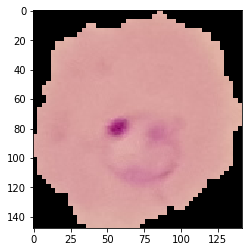

In [15]:
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path+'uninfected')

['C13NThinF_IMG_20150614_131318_cell_179.png',
 'C205ThinF_IMG_20151106_152003_cell_21.png',
 'C230ThinF_IMG_20151112_150647_cell_1.png',
 'C134P95ThinF_IMG_20151005_121834_cell_65.png',
 'C141P102ThinF_IMG_20151005_214836_cell_132.png',
 'C182P143NThinF_IMG_20151201_171950_cell_93.png',
 'C181P142ThinF_IMG_20151127_160616_cell_54.png',
 'C142P103ThinF_IMG_20151005_223257_cell_18.png',
 'C80P41ThinF_IMG_20150817_110608_cell_62.png',
 'C144P105ThinF_IMG_20151015_163142_cell_66.png',
 'C12NThinF_IMG_20150614_124212_cell_187.png',
 'C223ThinF_IMG_20151112_104708_cell_190.png',
 'C143P104ThinF_IMG_20151005_225746_cell_133.png',
 'C84P45ThinF_IMG_20150818_101056_cell_87.png',
 'C222ThinF_IMG_20151115_150925_cell_127.png',
 'C1_thinF_IMG_20150604_104919_cell_82.png',
 'C150P111ThinF_IMG_20151115_115950_cell_53.png',
 'C170P131ThinF_IMG_20151119_120233_cell_183.png',
 'C13NThinF_IMG_20150614_131529_cell_168.png',
 'C1_thinF_IMG_20150604_104919_cell_96.png',
 'C150P111ThinF_IMG_20151115_115950

In [17]:
uninfected = train_path+'uninfected/'+'C13NThinF_IMG_20150614_131318_cell_179.png'
uninfected

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/cell_images/train/uninfected/C13NThinF_IMG_20150614_131318_cell_179.png'

In [18]:
uninfected = imread(uninfected)

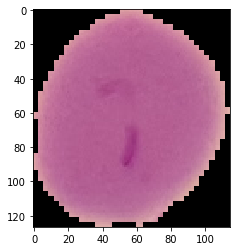

In [19]:
plt.imshow(uninfected)

In [20]:
pwd

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2'

In [21]:
len(os.listdir(train_path+'parasitized'))

12480

In [22]:
len(os.listdir(train_path+'uninfected'))

12480

In [23]:
len(os.listdir(test_path+'parasitized'))

1300

In [24]:
len(os.listdir(test_path+'uninfected'))

1300

In [25]:
# find dimensions of files

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [26]:
print(dim1,dim2)

[127, 109, 127, 118, 127, 118, 133, 115, 133, 142, 139, 121, 124, 133, 103, 148, 130, 118, 127, 142, 157, 175, 136, 151, 121, 160, 130, 139, 130, 154, 130, 148, 124, 136, 115, 151, 127, 124, 121, 121, 160, 127, 145, 124, 127, 124, 121, 112, 121, 178, 124, 145, 211, 142, 157, 118, 115, 145, 133, 133, 121, 121, 118, 136, 130, 127, 160, 115, 118, 142, 127, 145, 118, 118, 136, 121, 169, 130, 130, 121, 130, 139, 136, 112, 97, 142, 130, 124, 121, 136, 94, 130, 106, 163, 115, 130, 109, 103, 118, 124, 139, 121, 115, 127, 127, 121, 121, 130, 103, 163, 121, 184, 121, 103, 124, 112, 127, 139, 142, 118, 154, 124, 127, 145, 136, 118, 118, 139, 130, 157, 130, 130, 133, 115, 124, 151, 133, 127, 148, 139, 118, 151, 121, 124, 136, 124, 157, 130, 136, 163, 133, 136, 127, 169, 106, 142, 115, 136, 124, 118, 94, 157, 133, 118, 130, 139, 124, 139, 139, 151, 172, 142, 127, 145, 136, 124, 124, 166, 148, 109, 115, 148, 106, 136, 112, 121, 151, 166, 142, 118, 142, 160, 115, 112, 148, 142, 151, 103, 130, 121, 12

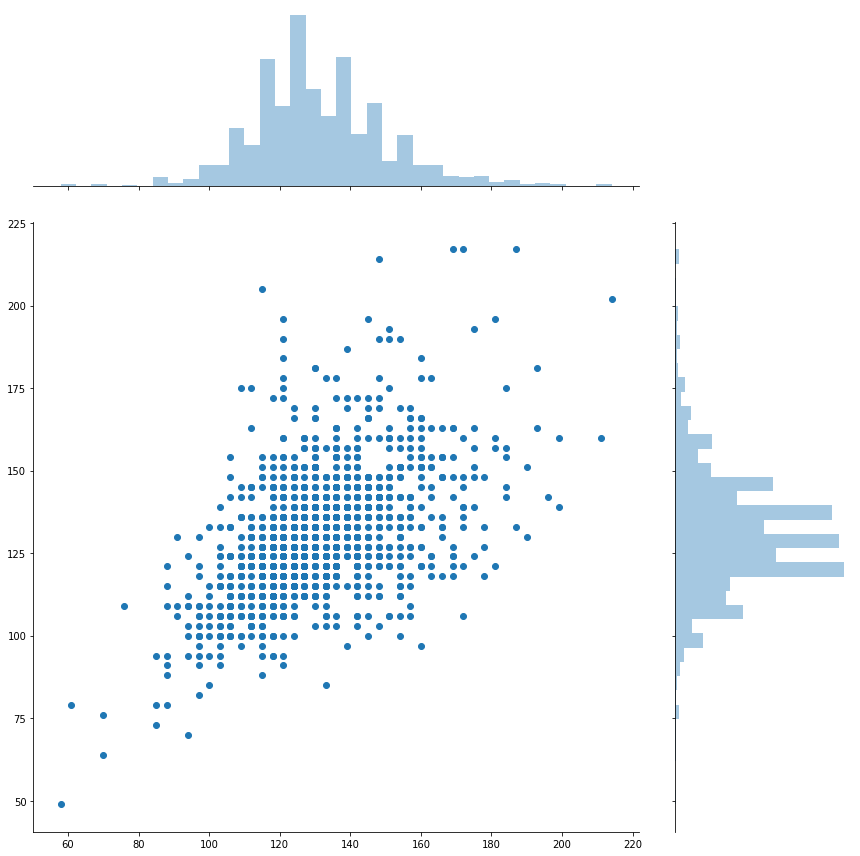

In [27]:

p = sns.jointplot(dim1,dim2,  height=12, ratio=3)

In [28]:
np.mean(dim1)

130.92538461538462

In [29]:
np.mean(dim2)

130.75

In [30]:
# will need to crop or pad other images

image_shape = (140 ,140, 3)

In [31]:
# data points
140*140*3

58800

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
imread(para_cell).max()

0.9098039

In [34]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [35]:
# rotate, and shift data

image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

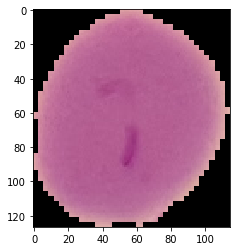

In [36]:
plt.imshow(uninfected)

In [37]:
uninfected

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

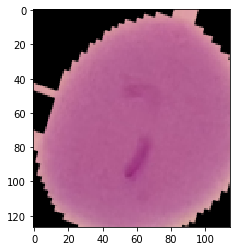

In [38]:
plt.imshow(image_gen.random_transform(uninfected))

In [39]:
# flow batches from a directory
# image_gen.flow_from_directory(train_path)

In [40]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [41]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [42]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 138, 138, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 69, 69, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [45]:
batch_size=16

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size = image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [52]:
train_image_gen.num_classes


2

In [47]:
# don't shuffle test data
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size = image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [48]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [49]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stopping])

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

# Evaluating the Model

In [78]:
# load the model that has been done

from tensorflow.keras.models import load_model

model = load_model('/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/04-CNNs/malaria_detector.h5')

In [79]:
losses = pd.DataFrame(model.history.history)

AttributeError: 'Sequential' object has no attribute 'history'

In [80]:
losses[['loss','val_loss']].plot()

NameError: name 'losses' is not defined

In [81]:
pwd

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2'

In [82]:
model.metrics_names

['loss', 'accuracy']

In [84]:
from tensorflow.keras.preprocessing import image

In [85]:
model.evaluate_generator(test_image_gen)

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [86]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [87]:
pred_probabilities

NameError: name 'pred_probabilities' is not defined

In [88]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [89]:
predictions = pred_probabilities > 0.5

NameError: name 'pred_probabilities' is not defined

In [90]:
# Numpy can treat this as True/False for us
predictions

NameError: name 'predictions' is not defined

In [91]:
print(classification_report(test_image_gen.classes,predictions))

NameError: name 'predictions' is not defined

In [92]:
confusion_matrix(test_image_gen.classes,predictions)

NameError: name 'predictions' is not defined

# Predicting on an Image

In [53]:
# Your file path will be different!
para_cell

'/Users/Bryan/Documents/Programming/Python_Courses/Tensorflow2/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [54]:
from tensorflow.keras.preprocessing import image

In [55]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [66]:
my_image = image.load_img(para_cell,target_size=(140, 140,3))

In [67]:
type(my_image)

PIL.Image.Image

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 138, 138, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 69, 69, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [69]:
my_img_arr = image.img_to_array(my_image)

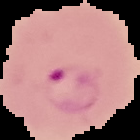

In [70]:
my_image

In [71]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [72]:
my_img_arr.shape

(140, 140, 3)

In [73]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [74]:
my_img_arr.shape

(1, 140, 140, 3)

In [75]:
model.predict(my_img_arr)

array([[0.94477785]], dtype=float32)

In [76]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}